In [1]:
import pandas as pd

In [15]:
path = '/content/drive/MyDrive/praksa_manu/reformatting_dataset/reformatted_stock_tweets.csv'

data = pd.read_csv(path)

data

,Date,Tweet,Stock Name,Company Name,Close
0,9/29/2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",268.209992
1,9/29/2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",268.209992
2,9/29/2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",268.209992
3,9/29/2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",268.209992
4,9/29/2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",268.209992
...,...,...,...,...,...
80788,10/7/2021,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,38.259998
80789,10/4/2021,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,34.110001
80790,10/1/2021,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,35.459999
80791,10/1/2021,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,35.459999


In [16]:
data.isnull().sum()

,0
Date,0
Tweet,0
Stock Name,0
Company Name,0
Close,17117


In [17]:
print(f"The percentage of null values in Close column are {(data['Close'].isnull().sum() / len(data)) * 100}%")

The percentage of null values in Close column are 21.186241382297972%


21% of the rows are without price for the stock on given date. We need to inspect the reasons and find the problem.

### Hypotesis1: API does not contain information about some stocks

In [22]:
print(f"There are total of {len(data['Stock Name'].unique())} different stock tickers in the dataset")

There are total of 25 different stock tickers in the dataset


In [26]:
close_null = data[data['Close'].isnull()]

In [27]:
close_null

,Date,Tweet,Stock Name,Company Name,Close
344,9/25/2022,Reuters reports that Tesla plans to construct ...,TSLA,"Tesla, Inc.",NaN
345,9/25/2022,"Warren Buffett, the 4th richest American (wort...",TSLA,"Tesla, Inc.",NaN
346,9/25/2022,"EVs are expensive, I get it, and some can't af...",TSLA,"Tesla, Inc.",NaN
347,9/25/2022,Can’t I just eat my Chinese food in peace🥲\r\n...,TSLA,"Tesla, Inc.",NaN
348,9/25/2022,"As I prepare for tonight's show, I'm looking a...",TSLA,"Tesla, Inc.",NaN
...,...,...,...,...,...
80773,10/24/2021,"$XPEV has revealed its flying car, rollout pla...",XPEV,XPeng Inc.,NaN
80775,10/17/2021,Weekly Watchlist 🎯 \r\n\r\n$BABA 175c &gt; 170...,XPEV,XPeng Inc.,NaN
80776,10/17/2021,XPeng’s manufacturing plants were designed wit...,XPEV,XPeng Inc.,NaN
80777,10/16/2021,Clean energy for clean air. The solar panel ro...,XPEV,XPeng Inc.,NaN


In [24]:
print(f"The number of rows which Close column is null are: {len(close_null['Stock Name'].value_counts())}")

The number of rows which Close column is null are: 25


We can see that there are null values for all of the stock ticker values in the dataset. We will eliminate the hypotesis of API not containing information about some stocks.

### Hypotesis2: API not containing information for some dates

In [28]:
close_null

,Date,Tweet,Stock Name,Company Name,Close
344,9/25/2022,Reuters reports that Tesla plans to construct ...,TSLA,"Tesla, Inc.",NaN
345,9/25/2022,"Warren Buffett, the 4th richest American (wort...",TSLA,"Tesla, Inc.",NaN
346,9/25/2022,"EVs are expensive, I get it, and some can't af...",TSLA,"Tesla, Inc.",NaN
347,9/25/2022,Can’t I just eat my Chinese food in peace🥲\r\n...,TSLA,"Tesla, Inc.",NaN
348,9/25/2022,"As I prepare for tonight's show, I'm looking a...",TSLA,"Tesla, Inc.",NaN
...,...,...,...,...,...
80773,10/24/2021,"$XPEV has revealed its flying car, rollout pla...",XPEV,XPeng Inc.,NaN
80775,10/17/2021,Weekly Watchlist 🎯 \r\n\r\n$BABA 175c &gt; 170...,XPEV,XPeng Inc.,NaN
80776,10/17/2021,XPeng’s manufacturing plants were designed wit...,XPEV,XPeng Inc.,NaN
80777,10/16/2021,Clean energy for clean air. The solar panel ro...,XPEV,XPeng Inc.,NaN


In [34]:
min_null_date = close_null['Date'].min()
max_null_date = close_null['Date'].max()


print(f"Earliest date with null values is: {min_null_date}, maximum date with null values is {max_null_date}")

Earliest date with null values is: 1/1/2022, maximum date with null values is 9/5/2022


In [37]:
not_null = data[data['Close'].notnull()]

not_null

,Date,Tweet,Stock Name,Company Name,Close
0,9/29/2022,Mainstream media has done an amazing job at br...,TSLA,"Tesla, Inc.",268.209992
1,9/29/2022,Tesla delivery estimates are at around 364k fr...,TSLA,"Tesla, Inc.",268.209992
2,9/29/2022,3/ Even if I include 63.0M unvested RSUs as of...,TSLA,"Tesla, Inc.",268.209992
3,9/29/2022,@RealDanODowd @WholeMarsBlog @Tesla Hahaha why...,TSLA,"Tesla, Inc.",268.209992
4,9/29/2022,"@RealDanODowd @Tesla Stop trying to kill kids,...",TSLA,"Tesla, Inc.",268.209992
...,...,...,...,...,...
80788,10/7/2021,Some of the fastest growing tech stocks on the...,XPEV,XPeng Inc.,38.259998
80789,10/4/2021,"With earnings on the horizon, here is a quick ...",XPEV,XPeng Inc.,34.110001
80790,10/1/2021,Our record delivery results are a testimony of...,XPEV,XPeng Inc.,35.459999
80791,10/1/2021,"We delivered 10,412 Smart EVs in Sep 2021, rea...",XPEV,XPeng Inc.,35.459999


In [39]:
min_not_null_date = not_null['Date'].min()
max_not_null_date = not_null['Date'].max()

print(f"Earliest date with not null values is: {min_not_null_date}, maximum date with not null values is {max_not_null_date}")

Earliest date with not null values is: 1/10/2022, maximum date with not null values is 9/9/2022


From the inspection above we can not define an interval of time where API did not work. The dates are mixed.


### Result

For the given dates where there are null values after manual checking for multiple stocks on dates where it is null we saw that the API YahooFinance do not have informations about them.
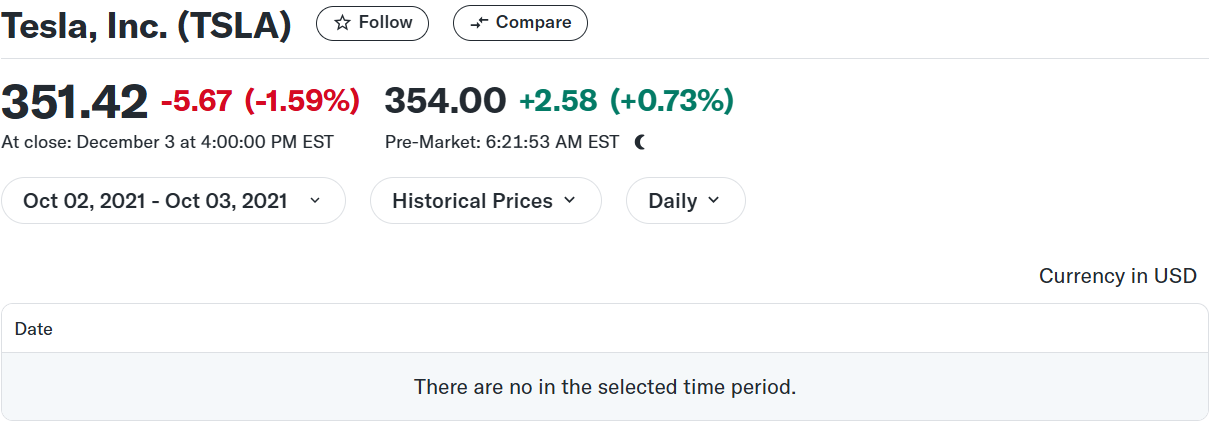

Also for XPEV stock:

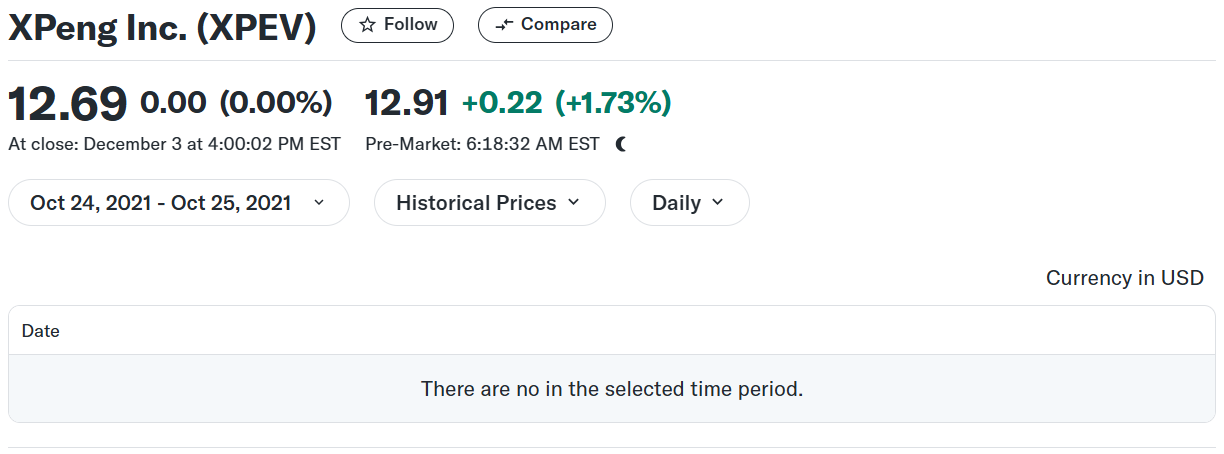

> Add blockquote

